In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("iris.data", header = None)

In [3]:
data = np.array(data)

In [4]:
count = 0
for row in data:
    for i in range(len(row)):
        if(count < 50) and i ==len(row) - 1:    
            count += 1
            row[-1] = 0
            continue;
        if(count < 100) and i == len(row) - 1:    
            count += 1
            row[-1] = 1
            continue;
        if(count < 150) and i == len(row) - 1:    
            count += 1
            row[-1] = 2
            continue;
            
        row[i] = float(row[i])
        

In [5]:
X ,Y = data[:,:-1], data[:,-1:]
Y = Y.flatten()


part a) Observation: The clusters are scattered and green and yellow are not linearly separable based on these <br> 2 components. The top 2 dimensions are plotted that have the maximum variance/information. Clusters are loosely bound.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

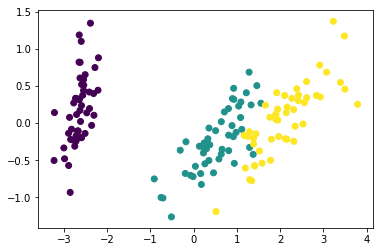

In [7]:
plt.scatter(principalComponents[:,0],principalComponents[:,1], c = Y)

part b) The clusters formed are more compact, more dense, more clearly identifiable. t-SNE mininmize the KLD<br> between 2 distributions. Green and yellow clusters still have some overlap and are not linearly separable in this<br> lower dimension.

In [8]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)


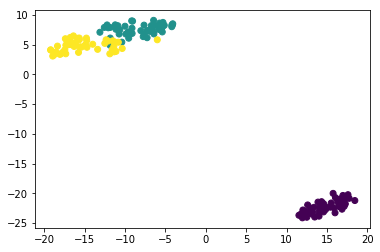

In [9]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = Y)

part c) PCA produces something like a spiral but tsne produces something like a plane that is slightly curved. t-SNE tries to understand the underlying structure of the swiss roll but pca is not able to do that it doesn't understand that a spiral is just a rolled plane. PCA does linear transformation and t-SNE does non linear transform.


In [10]:
from sklearn.datasets import make_swiss_roll
X, Y = make_swiss_roll(n_samples=1500, noise=0.0, random_state=1)


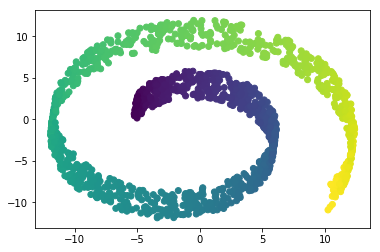

In [11]:
pcaSwiss = PCA(n_components=2)
principalComponents = pcaSwiss.fit_transform(X)
plt.scatter(principalComponents[:,0],principalComponents[:,1], c = Y)

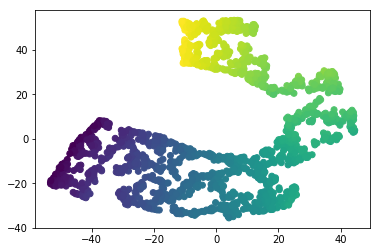

In [12]:
X_embeddedSwiss = TSNE(n_components=2, random_state = 1).fit_transform(X)
plt.scatter(X_embeddedSwiss[:,0],X_embeddedSwiss[:,1], c = Y)